# <span style='color:green'>Business Case :</span> Bike Rental dataset which contains the hourly and daily count of rental bikes in a Capital bikeshare system with the corresponding weather and seasonal information as well. The target is to predict the count of total rental bikes including both casual and registered.

# <span style='color:red'> Problem Defination :-</span> 
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions,
precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

The task is to predication of bike rental count hourly or daily based on the environmental and seasonal settings.

# <span style='color:blue'>Background</span>

Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return 
back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return 
back at another position. 

Currently, there are about over 500 bike-sharing programs around the world which is composed of 
over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, 
environmental and health issues. 

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by
these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.


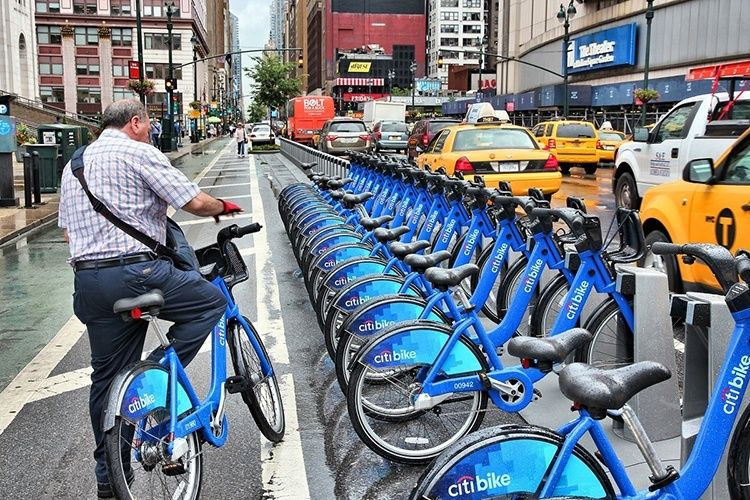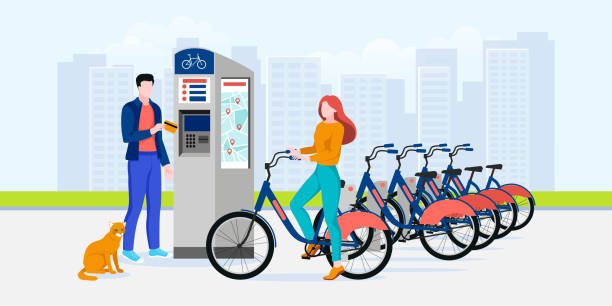

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=20

# Loading The dataset.

In [2]:
bsd= pd.read_csv('hour.csv')
bsd

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Dataset Characteristics

- **instant**: record index
- **dteday** : date

- **season** : season: 
                    1:springer,              
                    2:summer,
                    3:fall,
                    4:winter

- **yr** : year (0: 2011, 1:2012)
- **mnth** : month ( 1 to 12)
- **hr** : hour (0 to 23)
- **holiday** : weather day is holiday or not.

- **weekday** : day of the week

- **workingday** : if day is neither weekend nor holiday is 1, otherwise is 0.

- **weathersit** : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- **temp** : Normalized temperature in Celsius. The values are divided to 41 (max)
- **atemp**: Normalized feeling temperature in Celsius. The values are divided to 50 (max)

- **hum**: Normalized humidity. The values are divided to 100 (max)
- **windspeed**: Normalized wind speed. The values are divided to 67 (max)
- **casual**: count of casual users

- **registered**: count of registered users
- **cnt**: count of total rental bikes including both casual and registered.



In [3]:
bsd.shape                             # For getting shape of the Dataset

(17379, 17)

In [4]:
bsd.describe()                              # Statistical Info

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
bsd.info()                           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
# Identifying Unique value
bsd.apply(lambda x: len(x.unique()))

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

# Data Preprocessing 

In [7]:
# Checking is there any null value present or not

bsd.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Since there are no null value present we are good to go**

In [8]:
# Renaming some of the column name for more clarity

bsd= bsd.rename(columns={'weathersit':'weather',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'hum':'humidity',
                       'cnt':'count',
                       'workingday':'working_day',
                       'windspeed':'wind_speed'})

bsd.head()

,instant,dteday,season,year,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
# Now dropping some of the column as we don't need it.

bsd= bsd.drop(columns= ['instant','dteday','year'])
bsd.head()

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [10]:
# Changing categorical feature data type-'int' column into ' category' column.

cols= ['season', 'month','hour', 'holiday', 'weekday','working_day', 'weather']

for col in cols:
    bsd[col]= bsd[col].astype('category')
bsd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   season       17379 non-null  category
 1   month        17379 non-null  category
 2   hour         17379 non-null  category
 3   holiday      17379 non-null  category
 4   weekday      17379 non-null  category
 5   working_day  17379 non-null  category
 6   weather      17379 non-null  category
 7   temp         17379 non-null  float64 
 8   atemp        17379 non-null  float64 
 9   humidity     17379 non-null  float64 
 10  wind_speed   17379 non-null  float64 
 11  casual       17379 non-null  int64   
 12  registered   17379 non-null  int64   
 13  count        17379 non-null  int64   
dtypes: category(7), float64(4), int64(3)
memory usage: 1.0 MB


# Exploratory Data Analysis

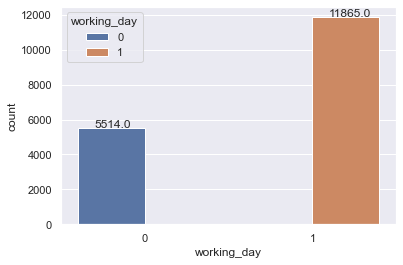

In [11]:
ax= sns.countplot(x='working_day', data=bsd, hue=bsd['working_day']) 

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

# 0= weekends or holidays, 1= workday/weekdays

**From above graph, it is clear that number of bike rented on workkdays are more than double than on weekends & holiday combined.**

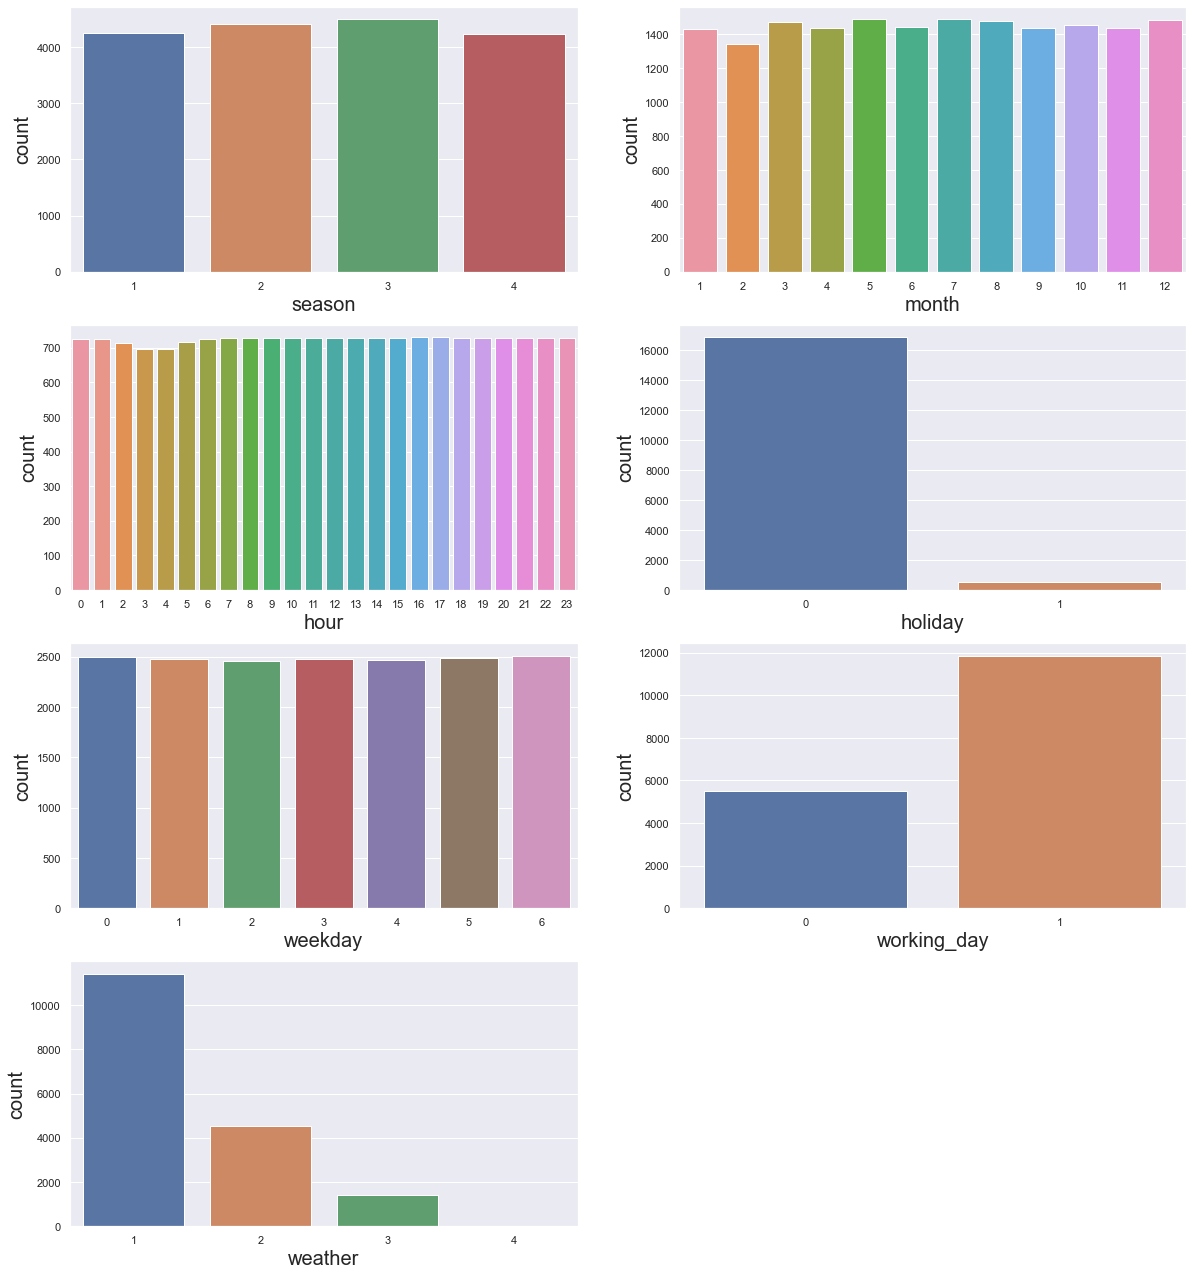

In [12]:
cat_v= bsd.select_dtypes(include=['category']).columns
plt.figure(figsize=(20,40))
plotnumber=1
for column in cat_v:
    if plotnumber<=21:
        
        plt.subplot(7,2,plotnumber)
        sns.countplot(x=bsd[column],data=bsd)
        plt.xlabel(column, fontsize=20)
        plt.ylabel("count",fontsize=20)
        
        plotnumber+=1
plt.show()

* **Rented bike count is highest in fall season followed by summer, and almost equal in winter and spring.**

* **Troghout weekdays the count of bike rented is almost constant.**

* **In clear weather condition the bike rented is highest, followed by mist=cloudy weather.**

Text(0.5, 1.0, 'Count of bikes during a week')

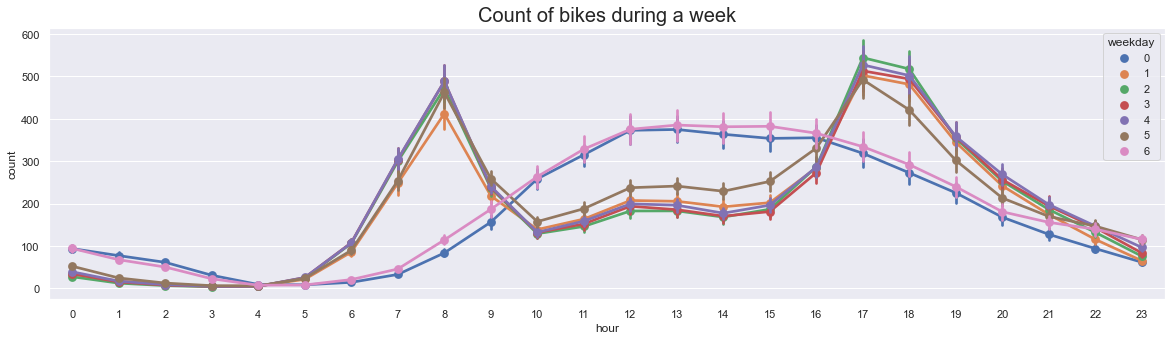

In [13]:
# Graph of weekly hours VS number of bike rented.

ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='hour', y='count', hue='weekday')
plt.title('Count of bikes during a week', fontsize=20)

In weekday, '0' represent Sunday, '1' =Monday, '2'= Tuesday and so on till '6' which represent Saturday.

**From the above graph we can see that during hours of the day:**

* In weekdays morning 7:00 Am to 9:00 AM & evening 16:00 to 20:00 which are office opening and closing time respectively, there is sharp increase in demand of bikes from which we can inference that majority of the rented bike are used by office going people.

* During weekends, the number of bike rented are higher in day time , From which we can say that they are being used for tourism or outing purposes.

Text(0.5, 1.0, 'Count of bikes during a week: Unregistered')

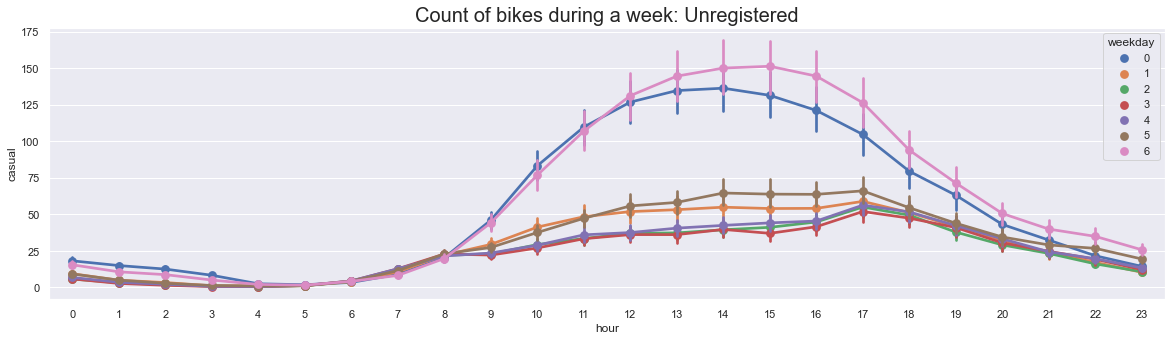

In [14]:
# Plotting graph to show number of unregistered user using bike.

fig,ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='hour', y='casual', hue='weekday')
plt.title('Count of bikes during a week: Unregistered', fontsize=20)


**From the above graph during hours of the day, we can say that mostly unregistered user rented bike on weekends.**

Text(0.5, 1.0, 'Count of bikes during a week : Registered')

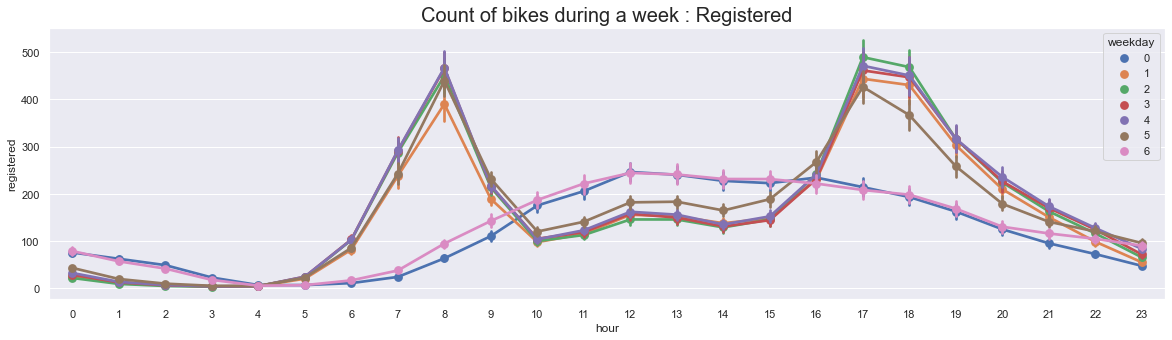

In [15]:
# Graph plotting to show number of registered user rented bike.

fig,ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='hour', y='registered', hue='weekday')
plt.title('Count of bikes during a week : Registered', fontsize=20)

**From the above graph during hours of the day, we can say mostly registered users rents bike on weekdays during office hours(i.e office opening and closing time)**

Text(0.5, 1.0, 'Count of bikes during different weathers')

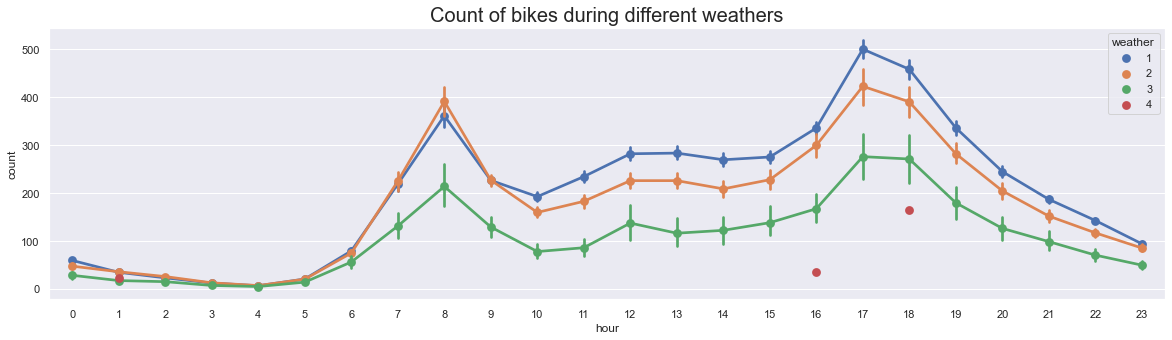

In [16]:
fig,ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='hour', y='count', hue='weather')
plt.title('Count of bikes during different weathers', fontsize= 20)

**From above graph during hours of the day, count of bikes is very high in clear and mist weather as compared to slightly rainy/snow weather, and almost negligible in case of heavy rain.**


Text(0.5, 1.0, 'Count of bikes during different seasons')

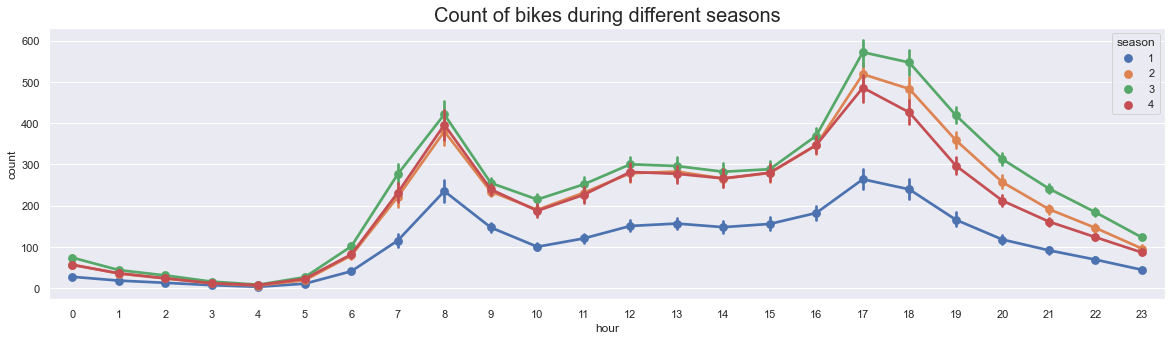

In [17]:
ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='hour', y='count', hue='season')
plt.title('Count of bikes during different seasons', fontsize= 20)

Text(0.5, 1.0, 'Count of bikes during different wind speed')

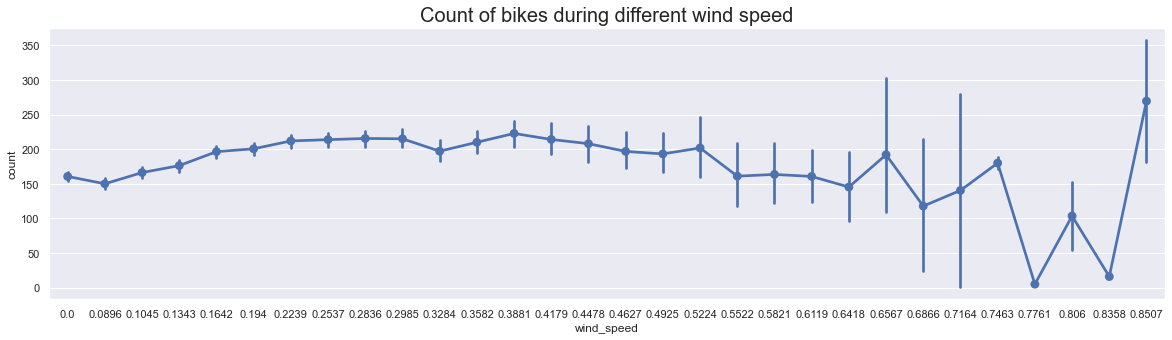

In [18]:
ax= plt.subplots(figsize=(20,5))
sns.pointplot(data=bsd, x='wind_speed', y='count')
plt.title('Count of bikes during different wind speed', fontsize=20)

**Not so much effect of wind speed on the count, except when wind speed is very high i.e above 0.75.** 

Text(0.5, 1.0, 'Count of bikes during different months')

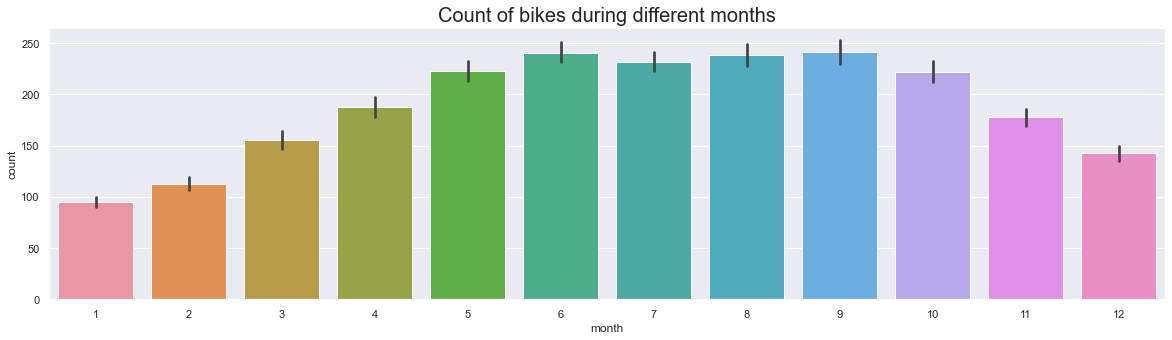

In [19]:
ax= plt.subplots(figsize=(20,5))
sns.barplot(data=bsd, x='month', y='count')
plt.title('Count of bikes during different months', fontsize= 20)

**The number of bike rented are very high between 'May to October' month.**

Text(0.5, 1.0, 'Count of bikes during weekdays')

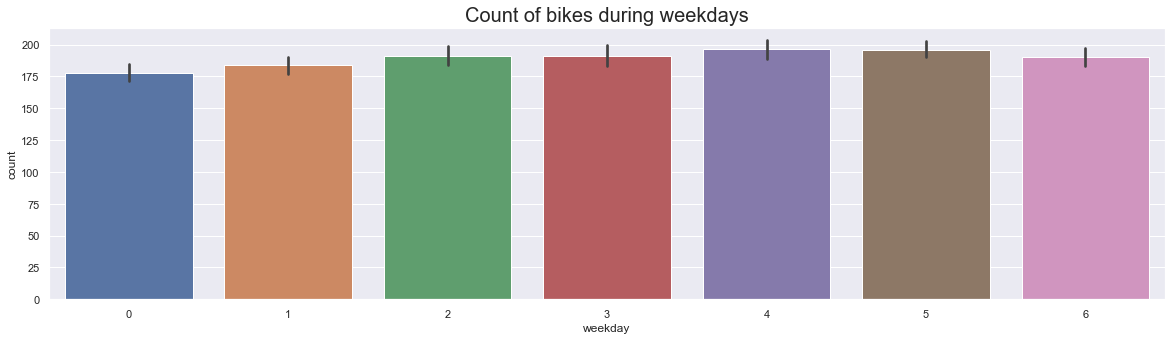

In [20]:
ax= plt.subplots(figsize=(20,5))
sns.barplot(data=bsd, x='weekday', y='count')
plt.title('Count of bikes during weekdays', fontsize= 20)

[Text(0.5, 1.0, 'Realation between humidity and users')]

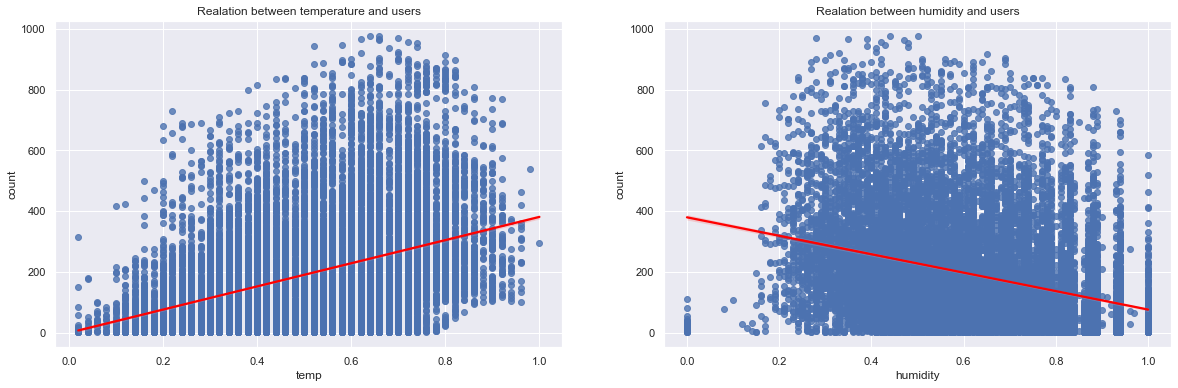

In [21]:
# Plotting regression plot for relation between temperature and humidity with count of rented bike.
fig, (ax1,ax2)= plt.subplots(ncols=2, figsize=(20,6))

sns.regplot(x=bsd['temp'],y=bsd['count'],ax=ax1, line_kws={"color": "red"})
ax1.set( title='Realation between temperature and users')

sns.regplot(x=bsd['humidity'],y=bsd['count'],ax=ax2, line_kws={"color": "red"})
ax2.set(title='Realation between humidity and users')



In [22]:
# Making new data set for numerical data.
bsd1= bsd[['registered', 'humidity', 'casual', 'temp', 'atemp']]

bsd1

,registered,humidity,casual,temp,atemp
0,13,0.81,3,0.24,0.2879
1,32,0.80,8,0.22,0.2727
2,27,0.80,5,0.22,0.2727
3,10,0.75,3,0.24,0.2879
4,1,0.75,0,0.24,0.2879
...,...,...,...,...,...
17374,108,0.60,11,0.26,0.2576
17375,81,0.60,8,0.26,0.2576
17376,83,0.60,7,0.26,0.2576
17377,48,0.56,13,0.26,0.2727


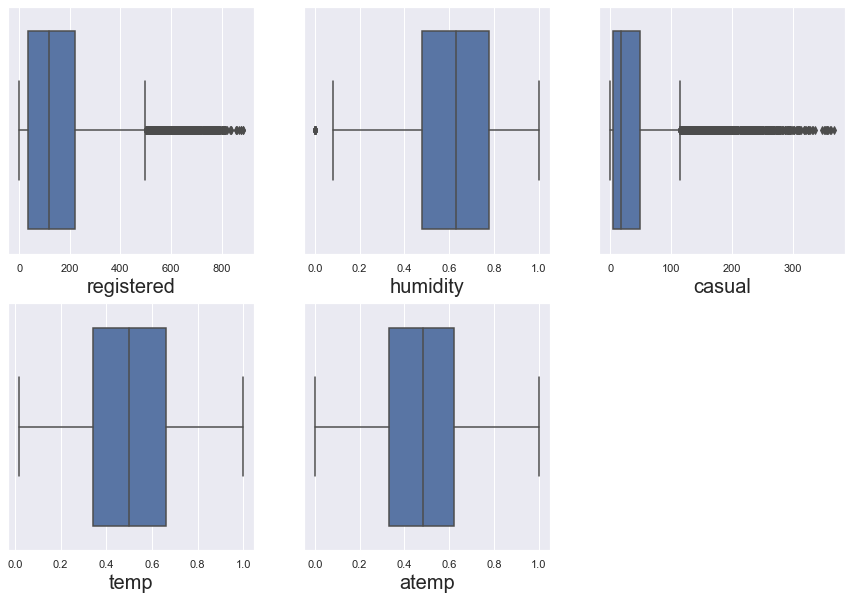

In [23]:
# Plotting box plot of each numerical data to identify outliers.

plt.figure(figsize=(15,10))
plotnumber=1

for column in bsd1:
    if plotnumber<=8 :
        ax= plt.subplot(2,3, plotnumber)
        sns.boxplot(x=bsd1[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

**From the box plot we can see that there arae ouliers present in registered and casual users**

In [24]:
from scipy import stats

<span style='color:red'>**For Casual**</span>

In [25]:
IQR= stats.iqr(bsd.casual, interpolation='midpoint')
IQR

44.0

In [26]:
Q1= bsd.casual.quantile(0.25)                    # defining 25% of data
Q3=bsd.casual.quantile(0.75)                    # defining 75% of data

min_limit=Q1 - 1.5*IQR              # setting minimum limit

max_limit=Q3 + 1.5*IQR              # setting maximum limit

In [27]:
print('Minimum casual user limit : ', min_limit)
print('Maximum casual user limit : ' , max_limit)

Minimum casual user limit :  -62.0
Maximum casual user limit :  114.0


In [28]:
bsd.loc[bsd['casual']<min_limit]                  # Checking values less than minimum limit 

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count


In [29]:
bsd.loc[bsd['casual']>max_limit]                 #checking values which are greater than maximum limit

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count
1633,1,3,14,0,0,0,1,0.46,0.4545,0.41,0.2985,144,106,250
1634,1,3,15,0,0,0,1,0.48,0.4697,0.39,0.3284,149,155,304
1635,1,3,16,0,0,0,1,0.46,0.4545,0.41,0.3881,124,132,256
1771,1,3,12,0,6,0,1,0.46,0.4545,0.33,0.4179,126,141,267
1772,1,3,13,0,6,0,1,0.50,0.4848,0.34,0.4627,174,127,301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16817,4,12,12,0,6,0,2,0.40,0.4091,0.87,0.2239,122,364,486
16818,4,12,13,0,6,0,2,0.40,0.4091,0.87,0.1642,148,399,547
16819,4,12,14,0,6,0,2,0.40,0.4091,0.87,0.2836,164,378,542
16820,4,12,15,0,6,0,1,0.42,0.4242,0.82,0.1642,167,374,541


In [30]:
#imputing outlier with with median

bsd.loc[bsd['casual']>max_limit,'casual']=np.median(bsd.casual)

In [31]:
#checking whether outlier remove or not.

bsd.loc[bsd['casual']>max_limit] 

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count


<function matplotlib.pyplot.show(close=None, block=None)>

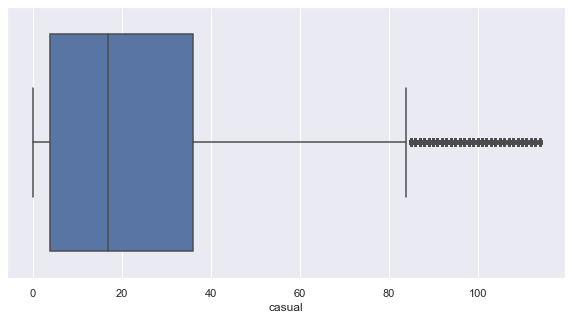

In [32]:
plt.figure(figsize=(10,5))
sns.boxplot(x=bsd['casual'])
plt.show

<span style='color:red'>**For Registered**</span> 

In [33]:
#calculating Inter quantile range.

IQR = stats.iqr(bsd.registered, interpolation = 'midpoint') 

IQR

186.0

In [34]:
Q1= bsd.registered.quantile(0.25)                    # defining 25% of data
Q3= bsd.registered.quantile(0.75)                    # defining 75% of data

min_limit=Q1 - 1.5*IQR              # setting minimum limit

max_limit=Q3 + 1.5*IQR              # setting maximum limit

In [35]:
print('Minimum registered users limit : ', min_limit)
print('Maximum registered users limit : ' , max_limit)

Minimum registered users limit :  -245.0
Maximum registered users limit :  499.0


In [36]:
bsd.loc[bsd['registered']<min_limit]                  # Checking values less than minimum limit 

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count


In [37]:
bsd.loc[bsd['registered']>max_limit]                 #checking values which are greater than maximum limit

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count
2995,2,5,17,0,1,1,1,0.62,0.6212,0.38,0.2537,59,539,598
3019,2,5,17,0,2,1,1,0.64,0.6212,0.33,0.0000,79,532,611
3067,2,5,17,0,4,1,2,0.64,0.6212,0.57,0.1940,54,540,594
3187,2,5,17,0,2,1,1,0.62,0.6061,0.65,0.4179,83,521,604
3379,2,5,17,0,3,1,1,0.74,0.6667,0.51,0.2239,77,524,601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17063,4,12,18,0,2,1,1,0.38,0.3939,0.46,0.3284,13,512,525
17077,4,12,8,0,3,1,1,0.24,0.2576,0.87,0.1045,13,665,678
17086,4,12,17,0,3,1,1,0.40,0.4091,0.50,0.3881,26,536,562
17087,4,12,18,0,3,1,1,0.38,0.3939,0.50,0.3582,23,546,569


In [38]:
#imputing outlier with with median

bsd.loc[bsd['registered']>max_limit,'registered']=np.median(bsd.registered)

In [39]:
#checking whether outlier remove or not.

bsd.loc[bsd['registered']>max_limit] 

,season,month,hour,holiday,weekday,working_day,weather,temp,atemp,humidity,wind_speed,casual,registered,count


<function matplotlib.pyplot.show(close=None, block=None)>

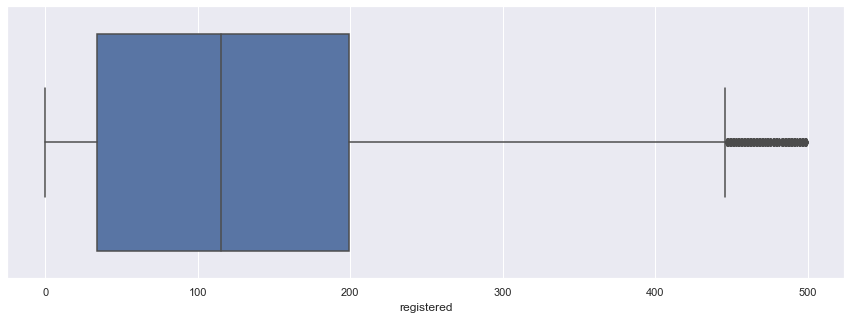

In [40]:
plt.figure(figsize=(15,5))
sns.boxplot(x=bsd['registered'])
plt.show

**We have somewhat reduced the outliers in "registered and casual" users.**

# Checking correlation

<AxesSubplot:>

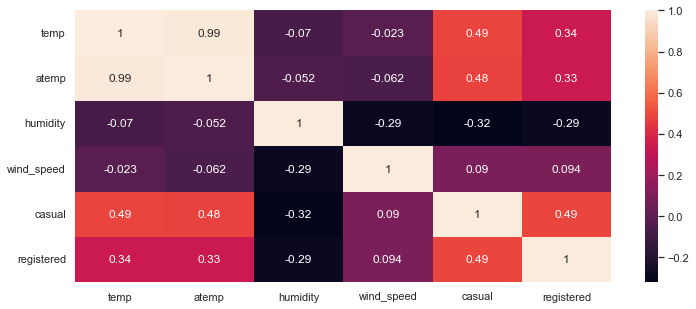

In [41]:
plt.figure(figsize=(12,5))
sns.heatmap(bsd.drop('count',axis=1).corr(),annot=True)

<span style='color:brown'>** As we can see from heatmap 'temp' and 'atemp' are highly correlated (i.e ~.99), so we will drop one of this feature </span>

In [42]:
bsd= bsd.drop(['atemp'], axis=1)                            # dropping 'atemp'.
bsd.head()

,season,month,hour,holiday,weekday,working_day,weather,temp,humidity,wind_speed,casual,registered,count
0,1,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16
1,1,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40
2,1,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32
3,1,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13
4,1,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1


# One Hot Encoding

In [43]:
# Applying 'One Hot Encoding'
bsd_oh= bsd

def one_hot_encoding(data, column):
    data= pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)        # creating dummies
    data= data.drop([column], axis=1)
    return data

cols=['season', 'month', 'hour', 'weekday', 'working_day', 'weather']

for col in cols:
    bsd_oh= one_hot_encoding(bsd_oh, col)

bsd_oh.head()

,holiday,temp,humidity,wind_speed,casual,registered,count,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,working_day_1,weather_2,weather_3,weather_4
0,0,0.24,0.81,0.0,3,13,16,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.22,0.80,0.0,8,32,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0.22,0.80,0.0,5,27,32,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0.24,0.75,0.0,3,10,13,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0.24,0.75,0.0,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# **Model Building**

In [44]:
## Definig independent and dependent variables

X= bsd_oh.drop(columns=['wind_speed','casual', 'registered', 'count'], axis=1)                      # independent variable
y= bsd_oh['count']                                        # dependent or target variable    

In [45]:
## Definging training and testing data.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.20, random_state=42)


# Model Creation

# <span style='color:blue'>Linear Regression</span>

In [46]:
from sklearn.linear_model import LinearRegression                        # importing the library

LR=LinearRegression()                                                    # creating the model object.

LR.fit(X_train,y_train)                                                  # fitting the training data.

y_hat=LR.predict(X_test)                                                 # prediciton from model

In [47]:
y_h=LR.predict(X_train)

In [48]:
# Transforming data 
# Here if you don't apply scaling still we will get almost similar results.
# But its a good practice to apply scaling to the linear regression models.
from sklearn.preprocessing import StandardScaler,MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

<span style='color:blue'>**Model Evaluation**</span>

In [49]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_train_predict=LR.predict(X_train)                        ##prediciton on training data

train_score=r2_score(y_train,y_h)
train_score

0.6318086100679143

In [50]:
test_score=r2_score(y_test,y_hat)
test_score

0.6260767701069425

In [51]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  11840.432882820134
MAE:  78.0689686441768


In [52]:
# RMSE-root mean squared error

import math
print(math.sqrt(mean_squared_error(y_test,y_hat)))                      

108.8137531878215


In [53]:
X_train.shape,X_test.shape

((13903, 50), (3476, 50))

In [54]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.63)*(13903-1)/(13903-50-1)
train_adjusted_r2

0.6286644527866012

In [55]:
test_adjusted_r2= 1-(1-0.62)*(3476-1)/(3476-50-1)
test_adjusted_r2

0.6144525547445255

In [56]:
print('intercept:', LR.intercept_)                        # c value [ in y= mx+c]

intercept: -32.69441467781235


In [57]:
print('slope:', LR.coef_)                                 # m0,m1,m2,m3,m4,m5,m6b

slope: [ 4.45962866e+13  2.78796875e+02 -1.04304688e+02  3.39843750e+01
  2.88046875e+01  7.03085938e+01 -2.08496094e+00  4.33105469e+00
 -3.22460938e+00  6.25952148e+00 -1.32382812e+01 -3.50971680e+01
 -1.47951660e+01  1.88974609e+01  3.09863281e+00 -1.93154297e+01
 -1.21875000e+01 -1.71685181e+01 -2.69545898e+01 -3.47089844e+01
 -3.65017090e+01 -2.04451294e+01  3.63015137e+01  1.72889771e+02
  3.16725342e+02  1.63029785e+02  1.04728882e+02  1.25264160e+02
  1.66814209e+02  1.60310059e+02  1.36786133e+02  1.44704102e+02
  2.12131592e+02  3.69248413e+02  3.31306763e+02  2.27422607e+02
  1.53558105e+02  1.04724838e+02  6.92892227e+01  2.97650909e+01
 -4.45962866e+13 -4.45962866e+13 -4.45962866e+13 -4.45962866e+13
 -4.45962866e+13  1.44716797e+01  4.45962866e+13 -7.49560547e+00
 -6.49934082e+01 -1.13523407e+02]


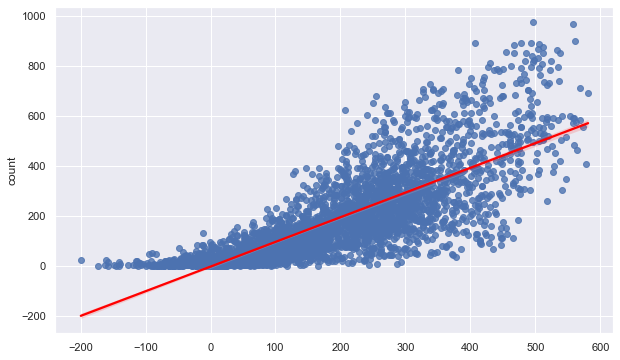

In [58]:
# Homoscedasticity check

plt.figure(figsize=(10,6))
sns.regplot((y_hat), (y_test), line_kws={"color": "red"})
plt.show()

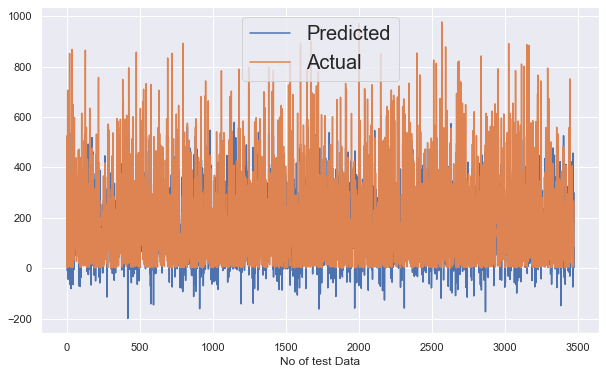

In [59]:
# Plotting model predicted vs actual data points.

plt.figure(figsize=(10,6))
plt.plot(y_hat)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'], fontsize=20)
plt.xlabel('No of test Data')
plt.show()

# <span style='color:brown'>Decision Tree Regressor</span> 

In [60]:
from sklearn.tree import DecisionTreeRegressor                       # importing 'Decision Tree Regressor' library.
dtr= DecisionTreeRegressor(criterion='mse',max_depth=10)

In [61]:
#Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=42)


In [62]:
#Fit the trained model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10)

In [63]:
y_hat= dtr.predict(X_test)  

In [64]:
y_h=dtr.predict(X_train)

In [65]:
y_train_predict=dtr.predict(X_train)                        ##prediciton on training data

train_score=r2_score(y_train,y_h)
train_score

0.743822439049149

In [66]:
test_score=r2_score(y_test,y_hat)
test_score

0.6603725438090651

In [67]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  10754.443101440387
MAE:  76.85585717906652


In [68]:
# RMSE-root mean squared error


print('Root Mean Square error is : ', math.sqrt(mean_squared_error(y_test,y_hat)))

Root Mean Square error is :  103.70363109091402


In [69]:
X_train.shape,X_test.shape

((13903, 50), (3476, 50))

In [70]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.74)*(13903-1)/(13903-50-1)
train_adjusted_r2

0.7390615073635576

In [71]:
test_adjusted_r2= 1-(1-0.65)*(3476-1)/(3476-50-1)
test_adjusted_r2

0.6448905109489051

In [72]:
model_r=dtr.fit(X_train,y_train)
y_pred= model_r.predict(X_test)
y_pred

array([471.56626506,  33.82823297,  87.05412908, ...,  33.82823297,
        95.26797108, 302.70833333])

[Text(0.5433043801759835, 0.9545454545454546, 'X[1] <= 0.47\nmse = 33201.925\nsamples = 13903\nvalue = 190.577'),
 Text(0.29609051501035194, 0.8636363636363636, 'X[24] <= 0.5\nmse = 18183.259\nsamples = 6431\nvalue = 124.841'),
 Text(0.17358954451345757, 0.7727272727272727, 'X[1] <= 0.31\nmse = 14432.867\nsamples = 6120\nvalue = 115.133'),
 Text(0.08721532091097309, 0.6818181818181818, 'X[25] <= 0.5\nmse = 6427.263\nsamples = 2650\nvalue = 73.816'),
 Text(0.05156573498964803, 0.5909090909090909, 'X[33] <= 0.5\nmse = 5944.115\nsamples = 2509\nvalue = 69.154'),
 Text(0.031055900621118012, 0.5, 'X[34] <= 0.5\nmse = 5431.898\nsamples = 2436\nvalue = 65.855'),
 Text(0.016563146997929608, 0.4090909090909091, 'X[23] <= 0.5\nmse = 4955.964\nsamples = 2358\nvalue = 62.523'),
 Text(0.008281573498964804, 0.3181818181818182, 'X[1] <= 0.25\nmse = 3852.374\nsamples = 2190\nvalue = 57.12'),
 Text(0.004140786749482402, 0.22727272727272727, 'X[2] <= 0.405\nmse = 1880.525\nsamples = 1226\nvalue = 41.337

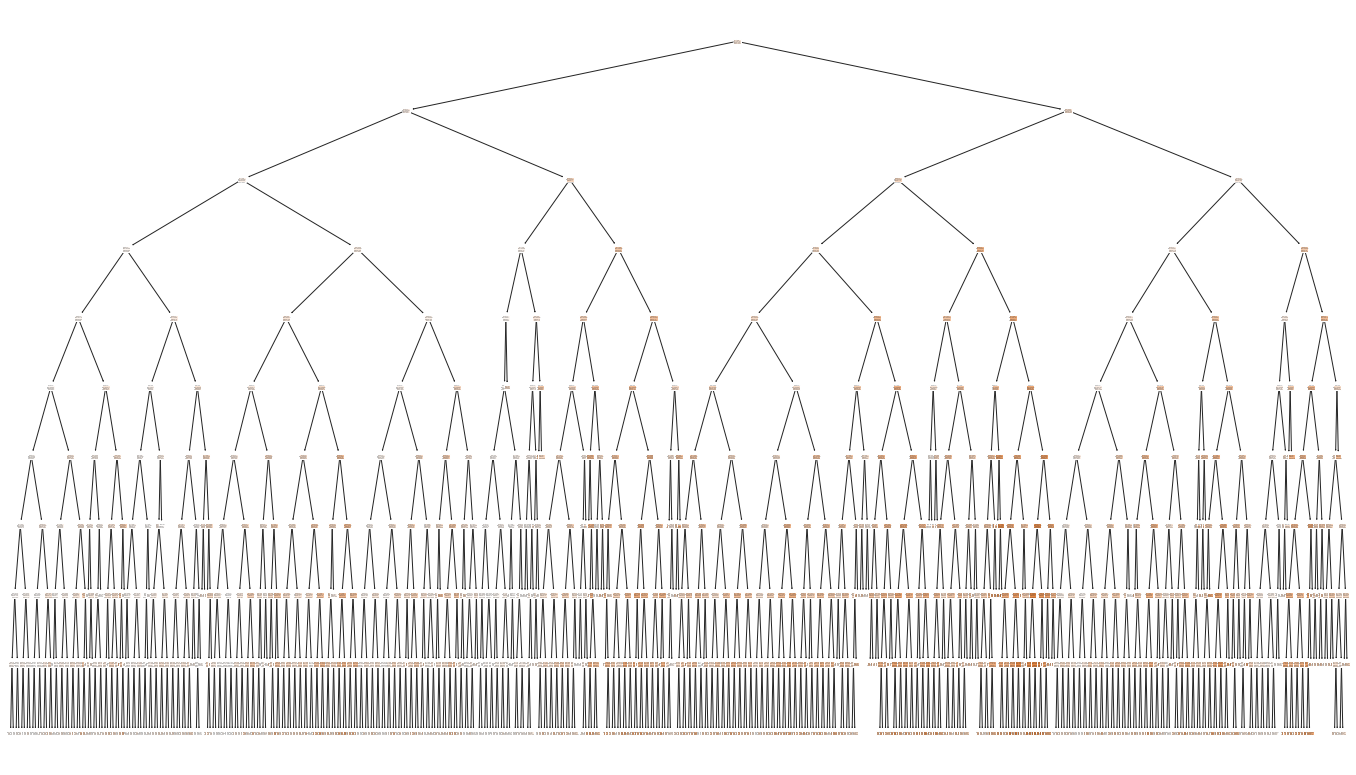

In [73]:
%matplotlib inline
from sklearn.tree import plot_tree                                # ploting decision tree

plt.figure(figsize=(24,14))
plot_tree(dtr, filled=True)

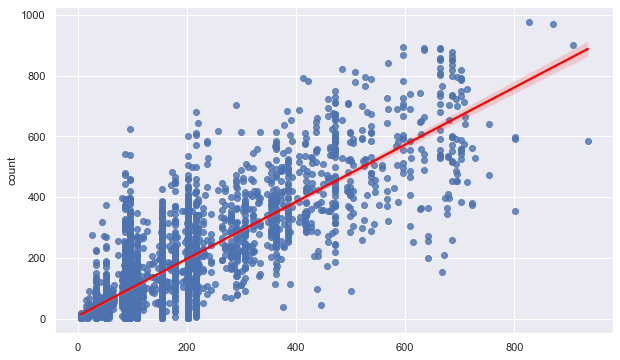

In [74]:
# Homoscedasticity check

plt.figure(figsize=(10,6))
sns.regplot((y_hat), (y_test), line_kws={"color": "red"})
plt.show()

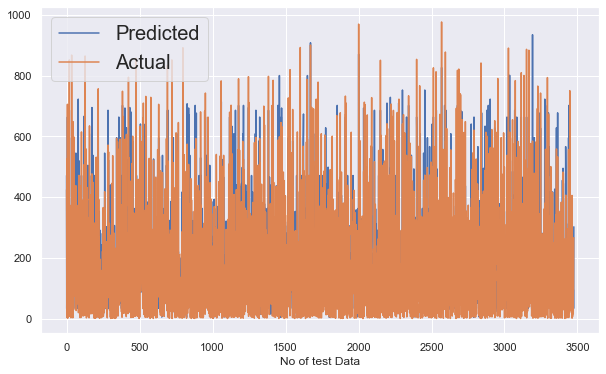

In [75]:
# Plotting model predicted vs actual data points.

plt.figure(figsize=(10,6))
plt.plot(y_hat)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'], fontsize=20)
plt.xlabel('No of test Data')
plt.show()

# Decision Tree- Random Forest Regressor

In [76]:
#  Importing libraray and Training the model
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

In [77]:
#Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2, random_state=2)



In [78]:
#Fit the trained model

rf.fit(X_train,y_train)

RandomForestRegressor()

In [79]:
y_hat= rf.predict(X_test)  

In [80]:
y_h= rf.predict(X_train)

In [81]:
y_train_predict= rf.predict(X_train)                        ##prediciton on training data

train_score=r2_score(y_train,y_h)
train_score

0.9747190913176336

In [82]:
test_score=r2_score(y_test,y_hat)
test_score

0.825614074406166

In [83]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  5840.01029055801
MAE:  50.41191578648145


In [84]:
X_train.shape,X_test.shape

((13903, 50), (3476, 50))

In [85]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.97)*(13903-1)/(13903-50-1)
train_adjusted_r2

0.9698917123881028

In [86]:
test_adjusted_r2= 1-(1-0.82)*(3476-1)/(3476-50-1)
test_adjusted_r2

0.8173722627737225

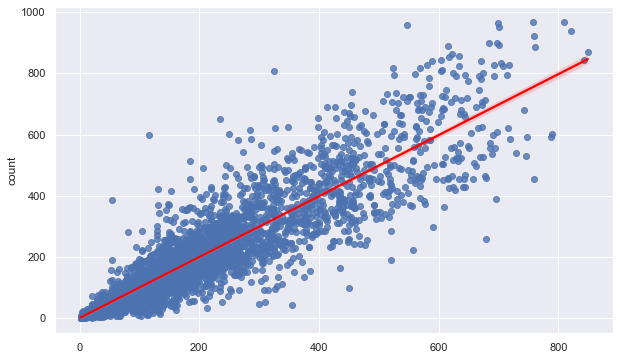

In [87]:
# Homoscedasticity check

plt.figure(figsize=(10,6))
sns.regplot((y_hat), (y_test), line_kws={"color": "red"})
plt.show()

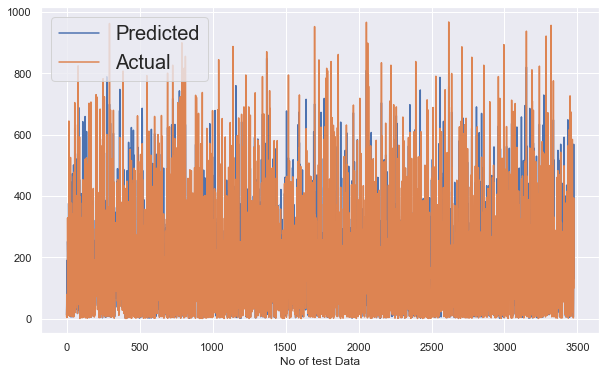

In [88]:
# Plotting model predicted vs actual data points.

plt.figure(figsize=(10,6))
plt.plot(y_hat)
plt.plot(np.array(y_test))
plt.legend(['Predicted','Actual'], fontsize=20)
plt.xlabel('No of test Data')
plt.show()

# Gradient Boosting Regressor

In [89]:
from sklearn.ensemble import GradientBoostingRegressor             # imporing GB Regressor library.

gbr= GradientBoostingRegressor(random_state=42)

gbr.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [90]:
y_hat= gbr.predict(X_test)  

In [91]:
y_h= gbr.predict(X_train)

In [92]:
y_train_predict= gbr.predict(X_train)                        # prediciton on training data

train_score=r2_score(y_train,y_h)
train_score

0.7480652976866005

In [93]:
test_score=r2_score(y_test,y_hat)
test_score

0.7405122084452038

In [94]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  8689.986693557823
MAE:  66.12221590822158


In [95]:
X_train.shape,X_test.shape

((13903, 50), (3476, 50))

In [96]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.74)*(13903-1)/(13903-50-1)
train_adjusted_r2

0.7390615073635576

In [97]:
test_adjusted_r2= 1-(1-0.74)*(3476-1)/(3476-50-1)
test_adjusted_r2

0.7362043795620439

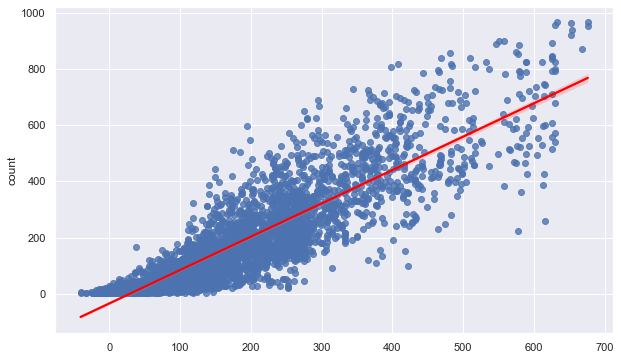

In [98]:

plt.figure(figsize=(10,6))
sns.regplot((y_hat), (y_test), line_kws={"color": "red"})
plt.show()

# XGBOOST

In [99]:
from xgboost import XGBRegressor

xgb_r= XGBRegressor( tree_method="gpu_hist", enable_categorical=True, use_label_encoder=False)                           # object creation
xgb_r.fit(X_train,y_train)                      # fitting the data
y_hat= xgb_r.predict(X_test)                     #predicting the price

In [100]:
y_h= xgb_r.predict(X_train)

In [101]:
y_train_predict= xgb_r.predict(X_train)                        # prediciton on training data

train_score=r2_score(y_train,y_h)
train_score

0.9073786897285404

In [102]:
test_score=r2_score(y_test,y_hat)
test_score

0.8309928564643937

In [103]:
# Mean Squared Error & Mean Absolute Error
print("MSE: ", mean_squared_error(y_test, y_hat))
print("MAE: ", mean_absolute_error(y_test, y_hat))

MSE:  5659.8802573357125
MAE:  51.18561684256216


In [104]:
X_train.shape,X_test.shape

((13903, 50), (3476, 50))

In [105]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-0.90)*(13903-1)/(13903-50-1)
train_adjusted_r2

0.899639041293676

In [106]:
test_adjusted_r2= 1-(1-0.83)*(3476-1)/(3476-50-1)
test_adjusted_r2

0.8275182481751824

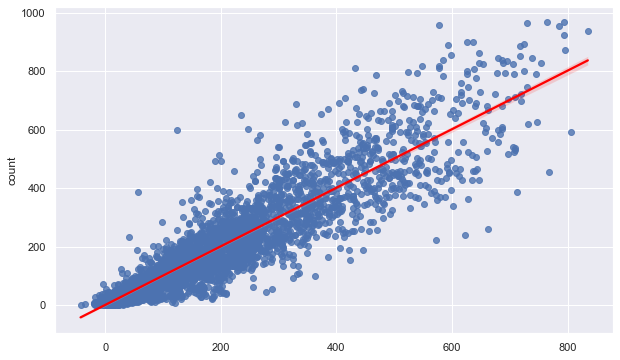

In [107]:
plt.figure(figsize=(10,6))
sns.regplot((y_hat), (y_test), line_kws={"color": "red"})
plt.show()

# <span style='color:purple'>Model Performances</span>

In [108]:
from tabulate import tabulate
 
# assign data
mydata = [
    ["1- Linear Regression", "0.62"],
    ["2- Decision Tree Regressor", "0.65"],
    ["3- Random Forest Regressor", "0.82"],
      ["4- Gradient Boosting Regressor", "0.74"],
    ["5- XGBoost Regressor", "0.83"]
]
 
# create header
head = ["Model_Name", "R2_Score"]
 
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------------------------------+------------+
| Model_Name                     |   R2_Score |
+================================+============+
| 1- Linear Regression           |       0.62 |
+--------------------------------+------------+
| 2- Decision Tree Regressor     |       0.65 |
+--------------------------------+------------+
| 3- Random Forest Regressor     |       0.82 |
+--------------------------------+------------+
| 4- Gradient Boosting Regressor |       0.74 |
+--------------------------------+------------+
| 5- XGBoost Regressor           |       0.83 |
+--------------------------------+------------+


# Insights & Conclusion

1. The rental count is likely to increase with an increase in temperature. So they should start marketing heavily 
in regions that are higher in termperature and humidity.


2. Rental count is likely to decrease in regions with light rain/snow weather patterns. Hence the company should 
not invest heavily in such regions as it will be an insignificant investment.


3. Fall season encounters a heavy rise in rental count. Hence the company should focus on regions with heavy rainfall
and specially during months July-October.


4. On the other hand, rental count is likely to decrease during Spring season (Feb-April). So company can offer
discounts or other offers that may enhance the numbers during Spring.


5. Rental count is likely to high with every passing year. Hence company must plan accordingly in advance on supply of
bikes per region.